In [2]:
import sys
import os

# Add parent directory to path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)#

# Now import
from GQEVT import *
from helper import *


In [3]:


from numpy.polynomial.chebyshev import Chebyshev, chebval
import numpy as np

from pyqsp.poly import PolyTaylorSeries

def eval_exp(poly,x):
    
    cheb_poly = Chebyshev(poly)  # ← instantiate once

    
    y0   = cheb_poly(x)          
    return y0

def generate_coeff_exp(n=30,beta=-1.0):
        '''
    
        Generate coefficients in the Chebychev basis for the function 1/x.
        '''
           # e^{β x} on  x∈[-1,1]
        samples = 2*n         # slight oversampling avoids aliasing

# build the Chebyshev expansion
        poly = PolyTaylorSeries()
        c,scale = poly.taylor_series(
            
                func          = lambda x: np.exp(beta * x),  # or np.exp(1j*t*x) for e^{i t x}
                degree        = n,
                chebyshev_basis = True,   # <- ask for Chebyshev—not monomial—coeffs
                cheb_samples  = samples,  # # of interpolation nodes
                return_scale  = True,
            )# only need the coefficients
        
      # c[0], c[1], … , c[n]  (d
        return c.coef,scale






 Matrix : 
 


<IPython.core.display.Math object>

[PolyTaylorSeries] (Cheb) max 0.33109149705429813 is at -1.0: normalizing
[PolyTaylorSeries] (Cheb) average error = 2.2121193765656243e-16 in the domain [-1, 1] using degree 30
Eigenvalues of A:  [ 5.12356370e-01 -9.42638074e-02 -3.29853686e-04  1.92237291e-01]


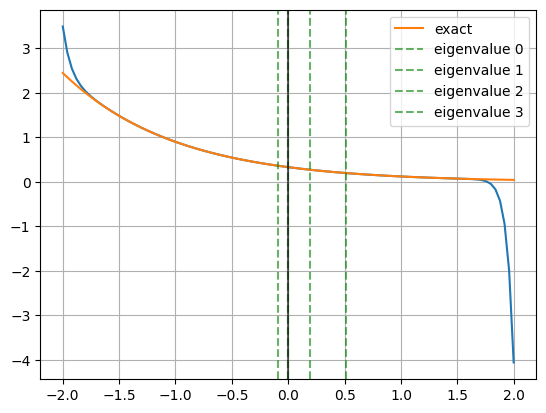

In [4]:
# Define Arbitrary Matrix to perform GQEVT

A = np.array([[0.01,0.22,0.11,0.0],[0.1,0.4,0,0.1],[0.1,0.2,0.2,0.1],[0.1,-0.2,0,0]])
#A=np.array([[0.2,0.1],[0.4,0.1]])

A=(A+A.conj().T)/2

# Taking the Hermitian part

print('\n Matrix : \n ')
latex_matrix(A)


# Define polynomial degree for approximation
n=30

# Define prefactor y=exp(beta*x)
beta=-1

poly,scale=generate_coeff_exp(n,beta)

x=np.linspace(-2,2,100)
plt.plot(x,eval_exp(poly,x))
plt.plot(x,scale*np.exp(-x),label='exact')
#plt.axvline(x=1/kappa)


es=np.linalg.eigvals(A)
for i,e in enumerate(es):
    plt.axvline(x=e,linestyle='--',label=f'eigenvalue {i}',alpha=0.6,c='g')
#plt.ylim(0,7)
plt.axvline(x=0,alpha=0.6,c='black')
plt.grid()
plt.legend()
print('Eigenvalues of A: ', es)

In [5]:
from scipy.linalg import expm   

gqevt=GQEVT(20,-1,'GQSP')



## Build the QEVT circuit for matrix A
gqevt.build(A)


result=gqevt.measure_qnode()

print('\nMeasurement results : \n\n' , result)


scale=gqevt.scale
exact=expm(-A)/gqevt.norm
print('Exact evaluation: \n', exact)
print('\nEigenvalues of transformed matrix (exact) : ',np.linalg.eigvals(exact))
#print('Calculated result from original eigenvals :',np.exp(-e1),np.exp(-e2),np.exp(-e3),np.exp(-e4))
print('Original eigenvalues:', es)



[PolyTaylorSeries] (Cheb) max 0.33109149705429847 is at -1.0: normalizing
[PolyTaylorSeries] (Cheb) average error = 2.1996293675385913e-16 in the domain [-1, 1] using degree 20

Measurement results : 

 tensor([ 0.6667+0.j, -0.0854+0.j, -0.0580+0.j, -0.0339+0.j,  0.7333+0.j,  0.0581+0.j,
         0.0406+0.j,  0.0315+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
         0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
       dtype=torch.complex128)
Exact evaluation: 
 [[ 0.66670502 -0.08543764 -0.05798999 -0.03388014]
 [-0.08543764  0.45307576 -0.04568331  0.03103513]
 [-0.05798999 -0.04568331  0.54810209 -0.02986464]
 [-0.03388014  0.03103513 -0.02986464  0.66433203]]

Eigenvalues of transformed matrix (exact) :  [0.3965486  0.727358   0.66214518 0.54616312]
Original eigenvalues: [ 5.12356370e-01 -9.42638074e-02 -3.29853686e-04  1.92237291e-01]


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
